In [22]:
#!/usr/bin/env python
from __future__ import division
from math import *
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from pylab import *

In [23]:
__author__  = "Eric Yeung"
__email__   = "eric.yeung@mail.utoronto.ca"

In [24]:
# QUESTION 1 A

In [25]:
theta = lambda z: pi - 2*asin(z)

In [26]:
theta(0.25)

2.636232143305636

In [27]:
# QUESTION 1 C

In [28]:
N = 1000 # number of particles
z = np.random.rand(N)
t = map(lambda z:pi-2*asin(z), z)
tr = np.array(t)

In [56]:
# Firstrange 170*pi/180 < theta < 190*pi/180
# Secondrange 90*pi/180 < theta < 110*pi/180

FirstRange = ((170*pi/180 < tr) & (tr < 190*pi/180)).sum()
SecondRange = ((90*pi/180 < tr) & (tr < 110*pi/180)).sum()

print "%s scattering angles lie between 170 degrees and 190 degrees." % FirstRange
print "%s scattering angles lie between 90 degrees and 110 degrees." % SecondRange

relativeprob = FirstRange/SecondRange

print "The probability of finding the particle in the range(170,190) relative to the range(90,110) is %s for N = %s" % (relativeprob, N)


85 scattering angles lie between 170 degrees and 190 degrees.
149 scattering angles lie between 90 degrees and 110 degrees.
The probability of finding the particle in the range(170,190) relative to the range(90,110) is 0.570469798658 for N = 1000


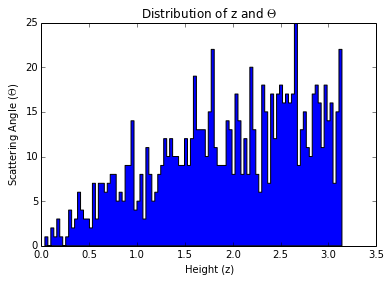

In [30]:
plt.hist(tr, bins = 100, color='b', histtype='stepfilled')

plt.xlabel('Height (z)')
plt.ylabel('Scattering Angle ($\Theta$)')
plt.title('Distribution of z and $\Theta$')


In [31]:
# Question 2 B

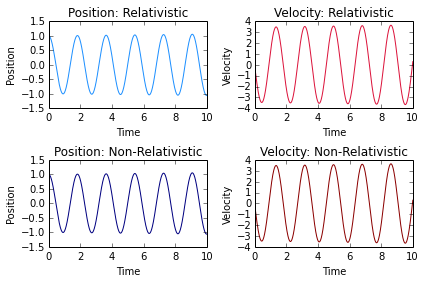

In [64]:
# Follows closely the file Tutorial01-decay.py

k = 12.
m = 1. # in metres 
c = 2.998e8
dt = 0.001
ti = 0.
tf = 10.

time=arange(ti,tf,dt)
tlen=len(time)

x = np.zeros(tlen)
v = np.zeros(tlen)

# initial conditions

x[0] = 1
v[0] = 0

i = 0

while i < tlen-1:
    x[i+1] = x[i] + v[i]*dt
    v[i+1] = v[i] - k/m*x[i]*(1- (v[i])**2/c**2)**(3/2)*dt
    i += 1



# With no relativistic effects, the v^2/c^2 -> 0 in our ODE above. This makes our system a lot cleaner and simple! 
# Define new variables xn, vn for non-relativistic position and velocities respectively. 

xn = np.zeros(tlen)
vn = np.zeros(tlen)

xn[0] = 1
vn[0] = 0

j = 0 

while j < tlen-1: 
    xn[j+1] = xn[j] + vn[j]*dt
    vn[j+1] = vn[j] - k/m*xn[j]*dt
    j += 1

f, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, sharex='row', sharey='col')
ax1.plot(time, x, color='dodgerblue')
ax1.set_title('Position: Relativistic')

ax2.plot(time, xn, color='navy')
ax2.set_title('Position: Non-Relativistic')

ax3.plot(time, v, color='crimson')
ax3.set_title('Velocity: Relativistic')

ax4.plot(time, vn, color='darkred')
ax4.set_title('Velocity: Non-Relativistic')

ax1.set_xlabel('Time')
ax2.set_xlabel('Time')
ax3.set_xlabel('Time')
ax4.set_xlabel('Time')

ax1.set_ylabel('Position')
ax2.set_ylabel('Position')
ax3.set_ylabel('Velocity')
ax4.set_ylabel('Velocity')

plt.tight_layout()
#plt.savefig('NR_R_graphs.png', dpi=4000, bbox_inches="tight")
plt.show()


In [55]:
# Show explicitly the difference after time evolution

print x[9999] - xn[9999] # Let the system evolve until the limit (1e4)
print v[9999] - vn[9999]

1.33226762955e-15
-1.23789867246e-14
